# Explore here

In [20]:
# Your code here
import requests

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado correctamente!")
else:
    print(f"Hubo un problema al descargar el archivo: {response.status_code}")


Archivo descargado correctamente!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



df=pd.read_csv('/workspaces/Finarosalina_machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv',  sep=';')
df.head()
# shape  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()
print(df[duplicados])

# Veo que hay 12 filas duplicadas, por lo que las elimino
print(f"Total de filas duplicadas: {duplicados.sum()}")

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [4]:
df=df.drop_duplicates()
duplicados = df.duplicated()
print(f"Total de filas duplicadas: {duplicados.sum()}")

Total de filas duplicadas: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Variables categoricas: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 

'y' : TARGET; El cliente contrata un depósito a largo plazo o no (categórico)

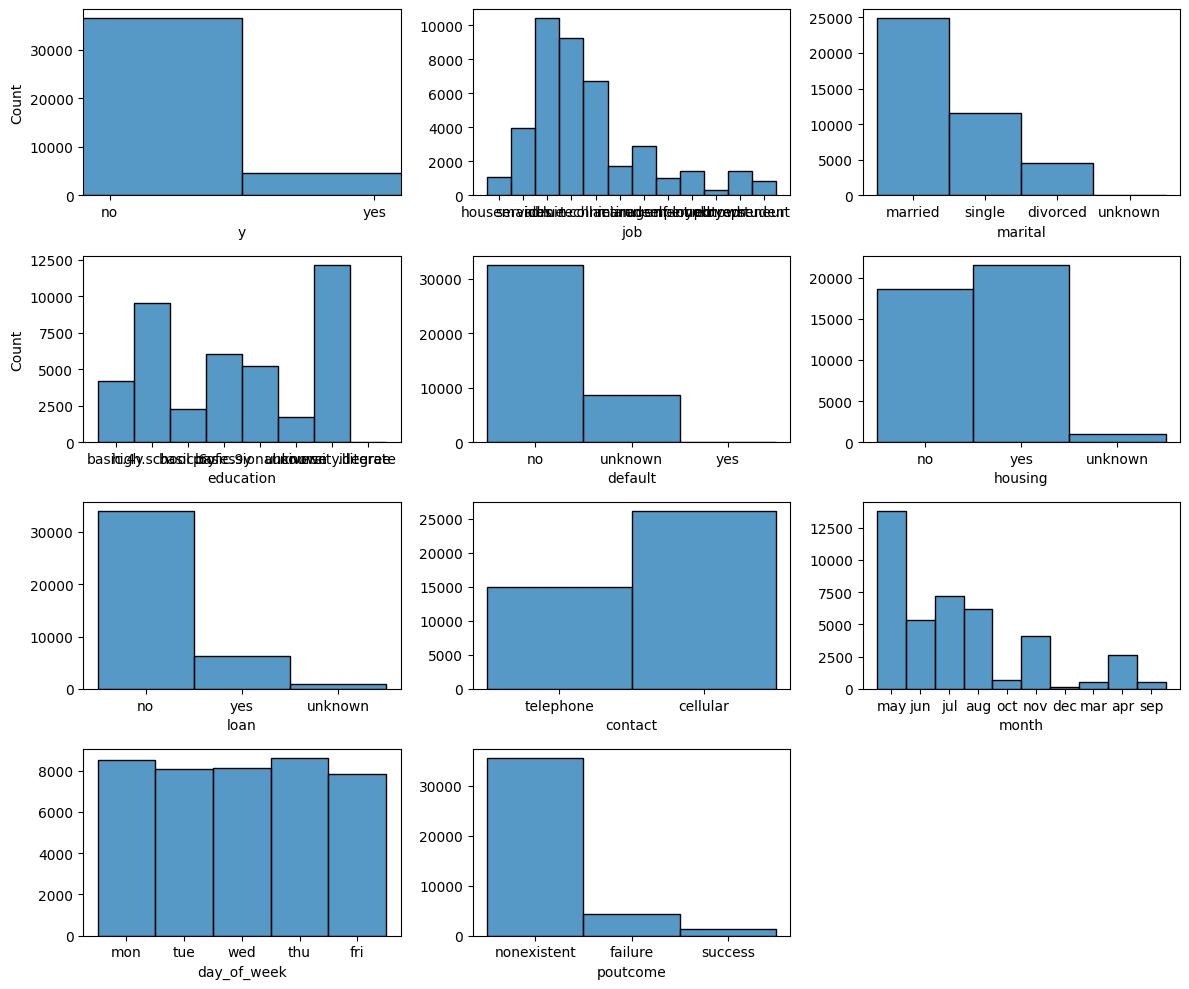

In [6]:
fig, axis = plt.subplots(4, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df, x="y").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[0, 1], data=df, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="marital").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="education")
sns.histplot(ax=axis[1, 1], data=df, x="default").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="housing").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="loan").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="contact").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df, x="month").set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x="poutcome").set(ylabel=None)

# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


El porcentanje de éxito (contratacion) es 4640/41188 = 11,26%. El que no lo ha contratado es 36.548

El atributo día de la semana tomas valores practicamente constantes con el tiempo, por lo que no debería indicir mucho en el éxito de la 
campaña. Si bien es cierto que lunes y jueves es un pelín mayor el exito de contactar y el viernes el peor día para contactar.

El resto de atributos tienes histogramas de frecuencia con distribución variable pero no constante.

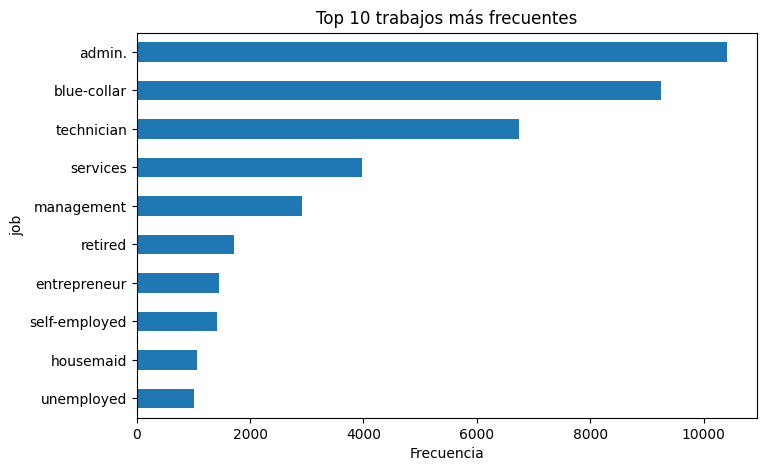

In [7]:
df['job'].value_counts().head(10)
df['job'].value_counts().head(10).plot(kind='barh', figsize=(8, 5))
plt.xlabel('Frecuencia')
plt.title('Top 10 trabajos más frecuentes')
plt.gca().invert_yaxis()  #  para que el más frecuente quede arriba
plt.show()

Análisis sobre variables numéricas

'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

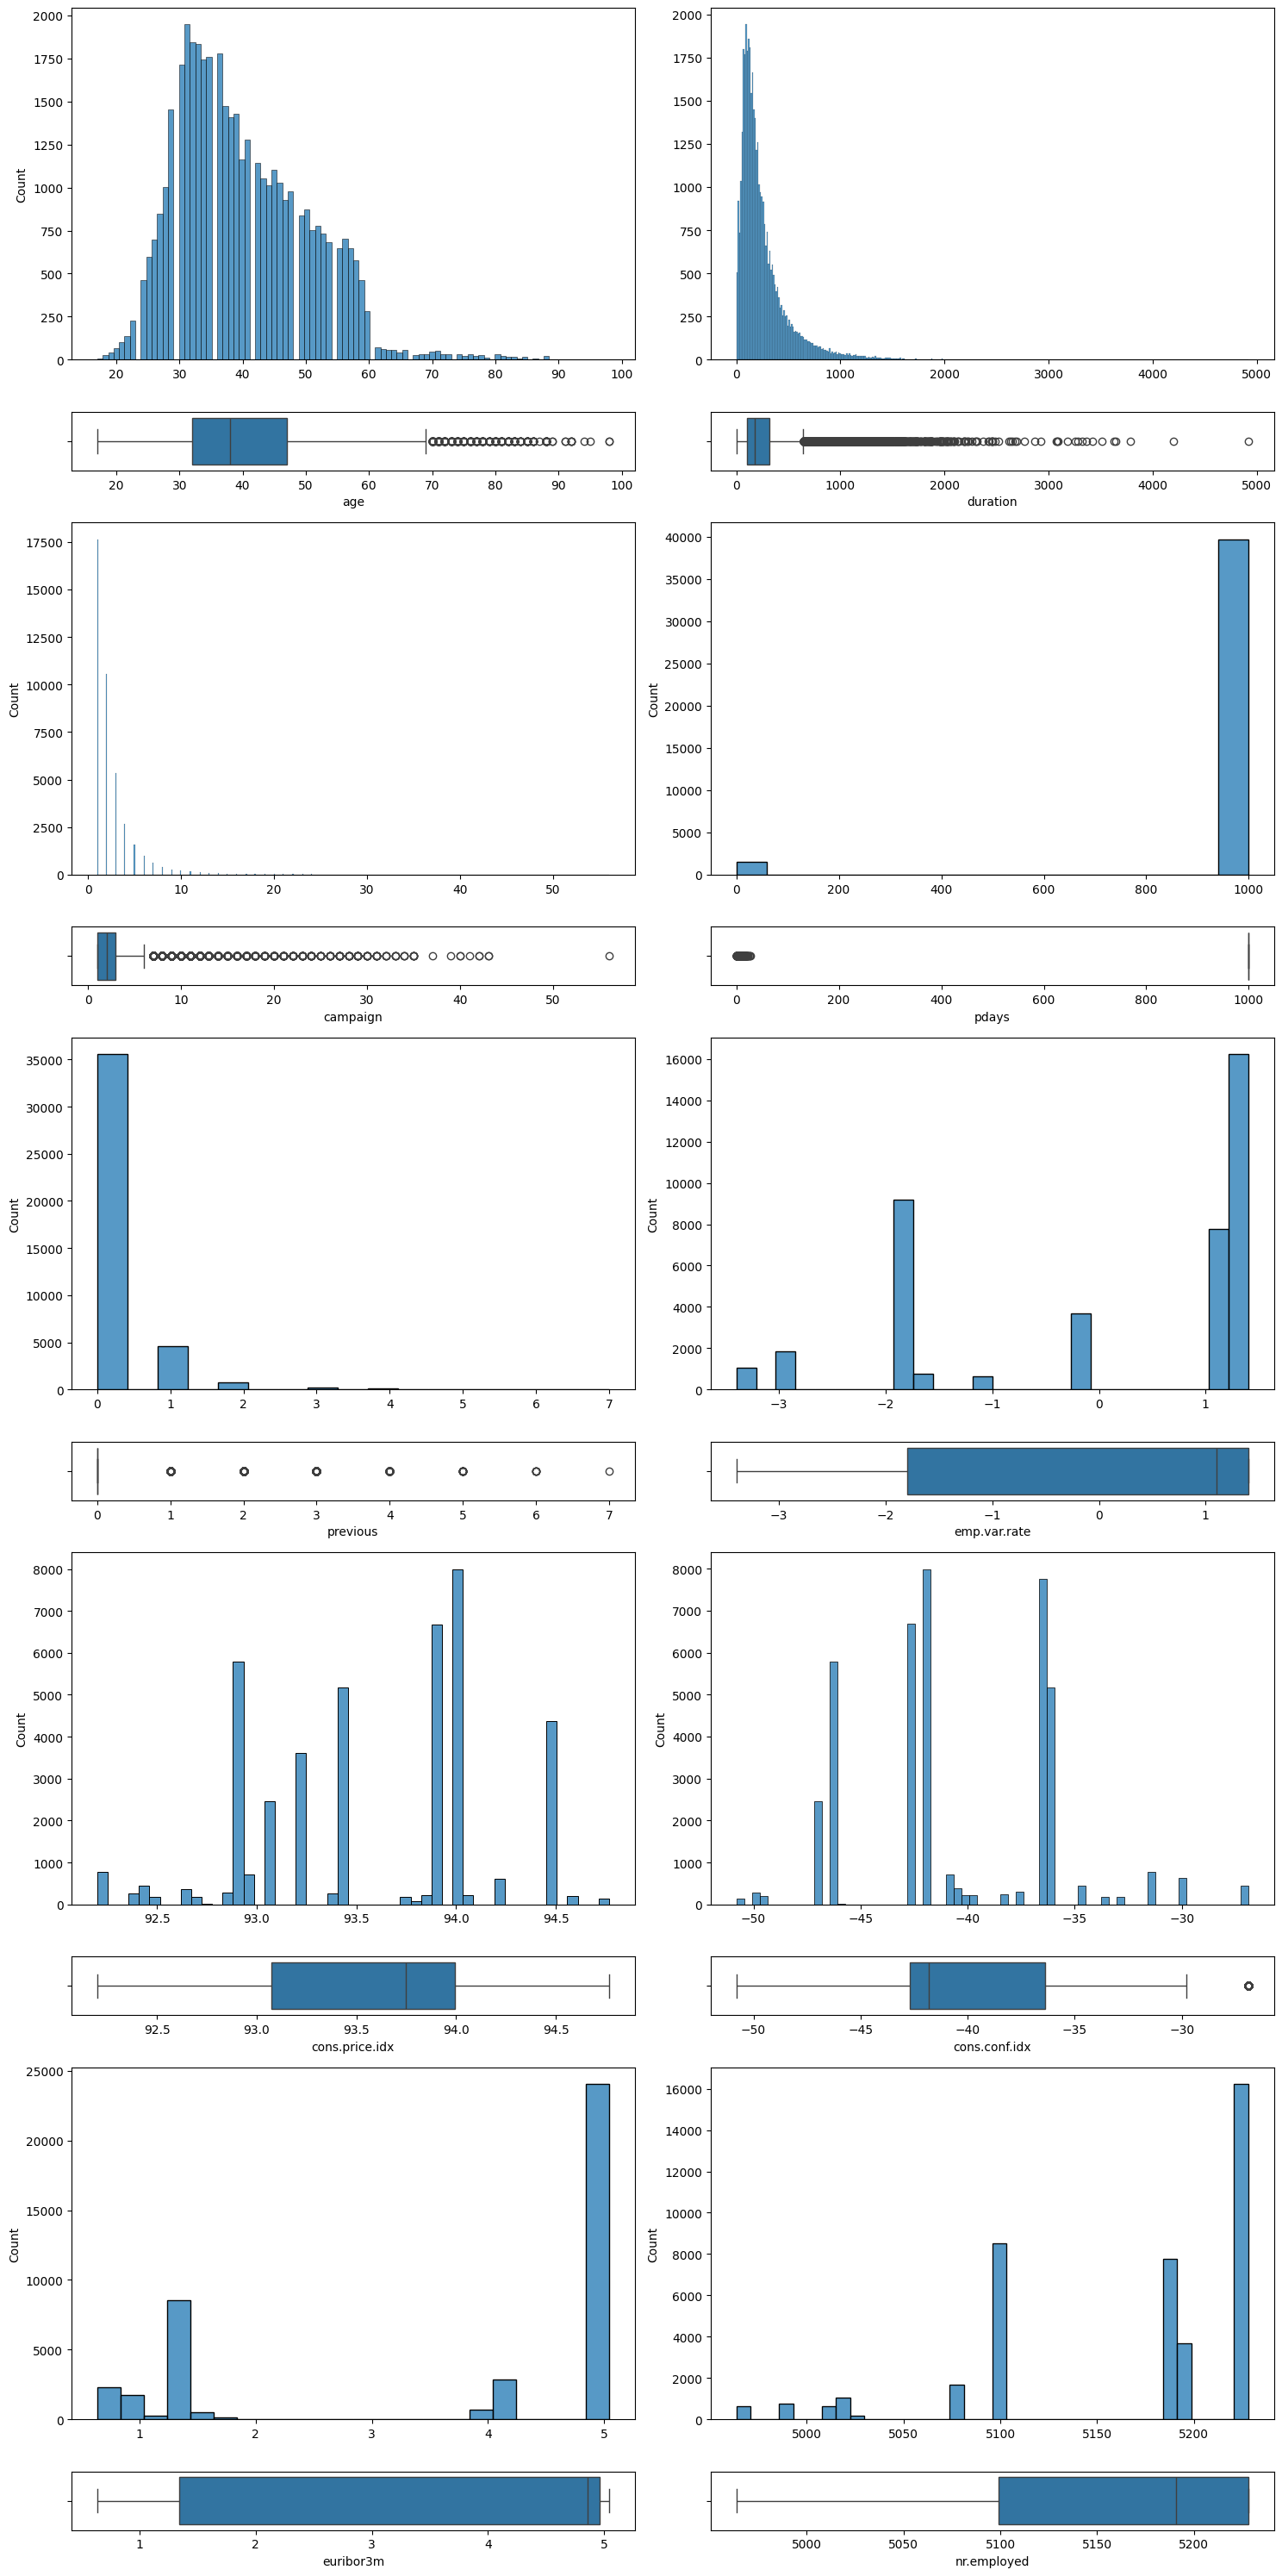

In [8]:
from matplotlib.gridspec import GridSpec

# Crear la figura y el GridSpec
fig = plt.figure(figsize=(15, 30))

# Usar GridSpec para dividir el espacio (10 filas, 2 columnas)
gs = GridSpec(10, 2, figure=fig, height_ratios=[6, 1] * 5)  # 5 pares de histograma y boxplot (10 filas en total)

# Crear los gráficos de histograma y boxplot
sns.histplot(ax=fig.add_subplot(gs[0, 0]), data=df, x="age").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[1, 0]), data=df, x="age")

sns.histplot(ax=fig.add_subplot(gs[0, 1]), data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=fig.add_subplot(gs[1, 1]), data=df, x="duration")

sns.histplot(ax=fig.add_subplot(gs[2, 0]), data=df, x="campaign").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[3, 0]), data=df, x="campaign")

sns.histplot(ax=fig.add_subplot(gs[2, 1]), data=df, x="pdays").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[3, 1]), data=df, x="pdays")

sns.histplot(ax=fig.add_subplot(gs[4, 0]), data=df, x="previous").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[5, 0]), data=df, x="previous")

sns.histplot(ax=fig.add_subplot(gs[4, 1]), data=df, x="emp.var.rate").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[5, 1]), data=df, x="emp.var.rate")

sns.histplot(ax=fig.add_subplot(gs[6, 0]), data=df, x="cons.price.idx").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[7, 0]), data=df, x="cons.price.idx")

sns.histplot(ax=fig.add_subplot(gs[6, 1]), data=df, x="cons.conf.idx").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[7, 1]), data=df, x="cons.conf.idx")

sns.histplot(ax=fig.add_subplot(gs[8, 0]), data=df, x="euribor3m").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[9, 0]), data=df, x="euribor3m")

sns.histplot(ax=fig.add_subplot(gs[8, 1]), data=df, x="nr.employed").set(xlabel=None)
sns.boxplot(ax=fig.add_subplot(gs[9, 1]), data=df, x="nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



OUTLIERS:

age: valor medio, y rango del 25-75% consistente con std razonable, practicamente entre 25-60 años caen la mayor parte de los valores, por lo que se podrían eliminar segurametne por encima y por debajo de ellos. Veremos los graficos cruzando por varyable "y". Sorprende una edad de 17 años, debería revisarse si es legal, o quizás luego se haya hablado con los padres y no se haya adecuado el contacto.

duration: se aprecian mucho más outliers, ver si son demasiados para eliminar.

campaign: hay valores atipicos que debería revisarse si se trata de un error, o si alguien  porque no tiene logica contactar 56 veces con la misma persona, cuando el 75% y la media están entre 2 y 3. Y lo peor es que no contrató.

pdays: revisar, clientes que han pasado 0 días o similar desde la ultima campaña,y se ha vuelto a contactar, pero de esta gente si se han hecho contratos. Se aprecian claros outliers, dado que la mayoría de los valores estan próxiomos a 1000.

cons.conf idx

previous: se pueden eliminar, apenas hay.

In [9]:
df[df['age'] > 70].shape

(421, 21)

In [10]:

print(df[df['age'] > 70]['y'].sum())  # son valores atipicos pero aqui el % contratacion se dispara, por lo que no los saco.
porcentaje_contratacion_mayores_70=130/421*100
porcentaje_contratacion_mayores_70   #  30.8 % lo que es considerablemente mayor que el promedio (11,27%)

nononoyesyesnoyesyesnoyesnonoyesyesyesnoyesnoyesnonoyesnonoyesyesnonoyesnononoyesyesnoyesyesnoyesyesyesnonononononoyesnonononononononononoyesyesnononononononononoyesnonononononoyesnoyesyesnoyesyesnononoyesyesyesyesnonononononoyesnononoyesyesnoyesyesyesyesyesnoyesnonoyesnonoyesyesyesnonoyesnonononoyesnoyesnoyesnonononoyesyesnoyesnoyesnonoyesnonoyesnononoyesnoyesnonoyesyesyesnoyesnononononononoyesnonononoyesnonoyesnoyesnononoyesyesyesyesnoyesnoyesnoyesnononoyesnoyesyesnonoyesnonoyesyesyesyesyesyesyesyesnoyesyesnoyesyesyesnoyesyesyesyesnoyesyesnoyesyesnonononoyesnonoyesnonoyesnononoyesnoyesnoyesyesnonoyesyesnonoyesyesyesyesnoyesyesyesnoyesyesnoyesyesnonononoyesnoyesnoyesyesyesyesyesnoyesyesyesnoyesyesnoyesyesyesnoyesyesyesnoyesnononoyesnonoyesyesnoyesnoyesyesyesnoyesyesyesnononononoyesyesyesyesyesnoyesnoyesyesyesnoyesyesnoyesnonoyesyesyesyesnonoyesyesyesnoyesyesyesyesnoyesnoyesyesnoyesyesyesyesnonoyesnoyesnonoyesnonoyesnoyesyesnoyesnonoyesnonoyesnononononononoyesyesyesnonoyesnoyesyesyesye

30.878859857482183

In [11]:
# df[df['pdays']<100].value_counts()  # 1515

In [12]:
df['y'].describe()

count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object

age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)

y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

Análisis de variables multivariante

Numérico-Numérico

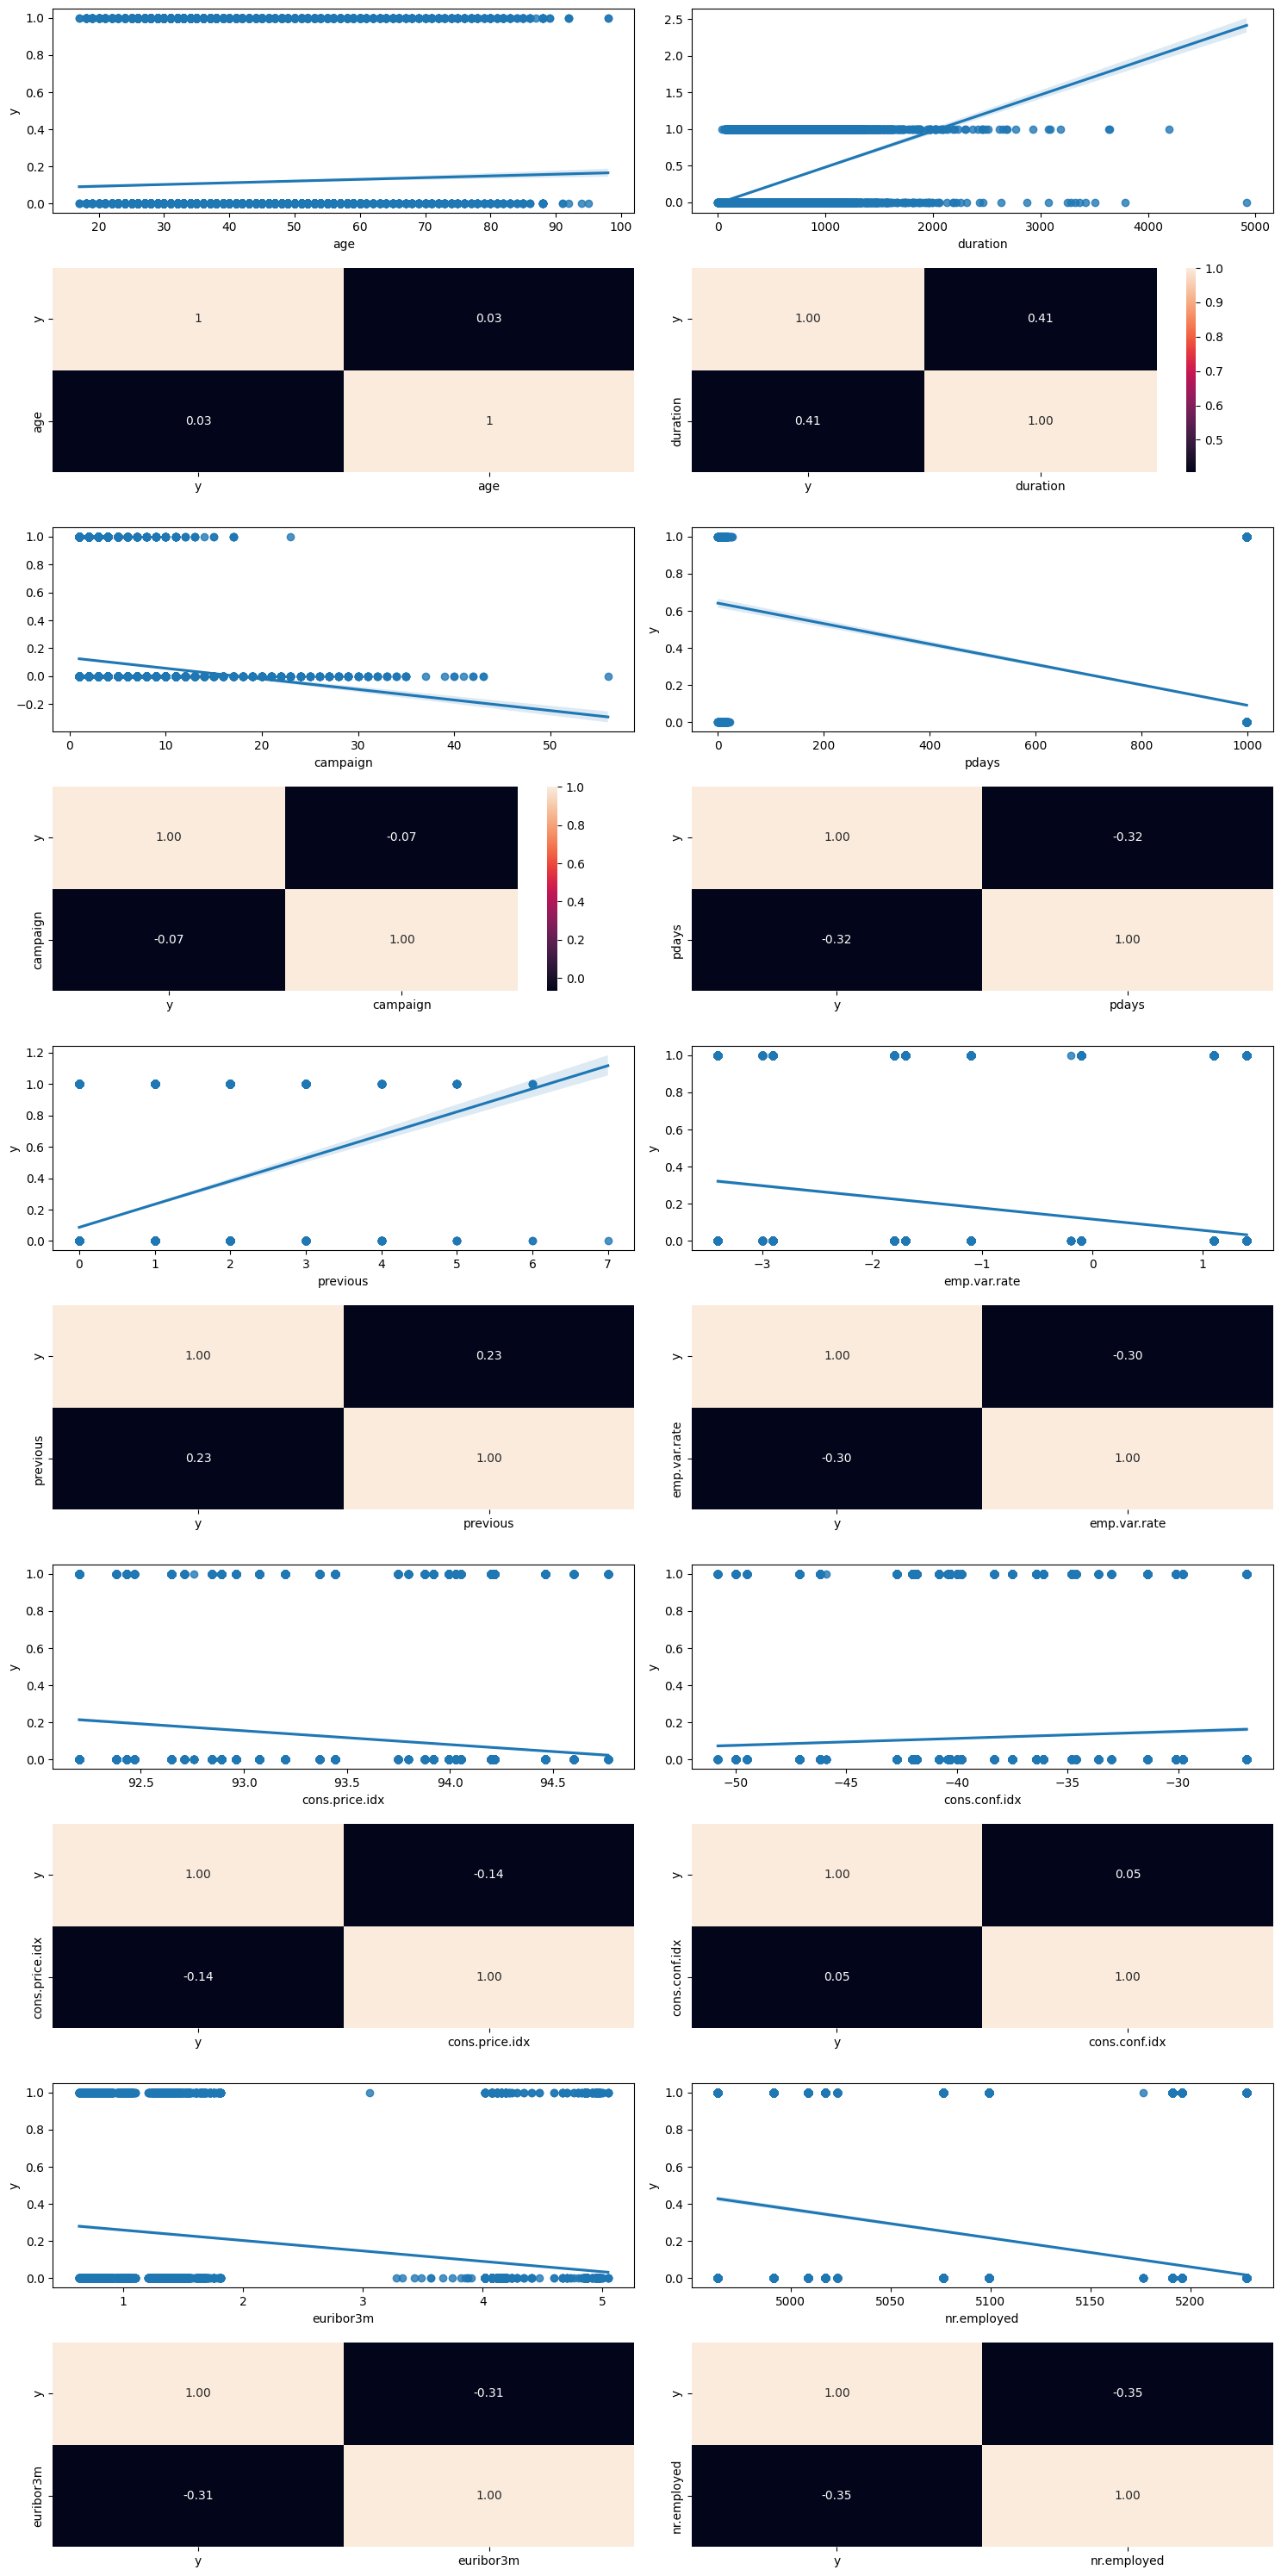

In [13]:
df["y"] = df["y"].map({"yes": 1, "no": 0})

fig, axis = plt.subplots(10, 2, figsize = (15, 30))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "y")
sns.heatmap(df[["y", "age"]].corr(), annot = True, ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "duration", y = "y").set(ylabel=None)
sns.heatmap(df[["y", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "campaign", y = "y").set(ylabel=None)
sns.heatmap(df[["y", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df, x = "pdays", y = "y")
sns.heatmap(df[["y", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = df, x = "previous", y = "y")
sns.heatmap(df[["y", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[5,0], cbar = False)

sns.regplot(ax = axis[4, 1], data = df, x = "emp.var.rate", y = "y")
sns.heatmap(df[["y", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[6, 0], data = df, x = "cons.price.idx", y = "y")
sns.heatmap(df[["y", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

sns.regplot(ax = axis[6, 1], data = df, x = "cons.conf.idx", y = "y")
sns.heatmap(df[["y", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1], cbar = False)

sns.regplot(ax = axis[8, 0], data = df, x = "euribor3m", y = "y")
sns.heatmap(df[["y", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[9, 0], cbar = False)

sns.regplot(ax = axis[8, 1], data = df, x = "nr.employed", y = "y")
sns.heatmap(df[["y", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[9, 1], cbar = False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis categórico-categórico

Variables categoricas: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' 

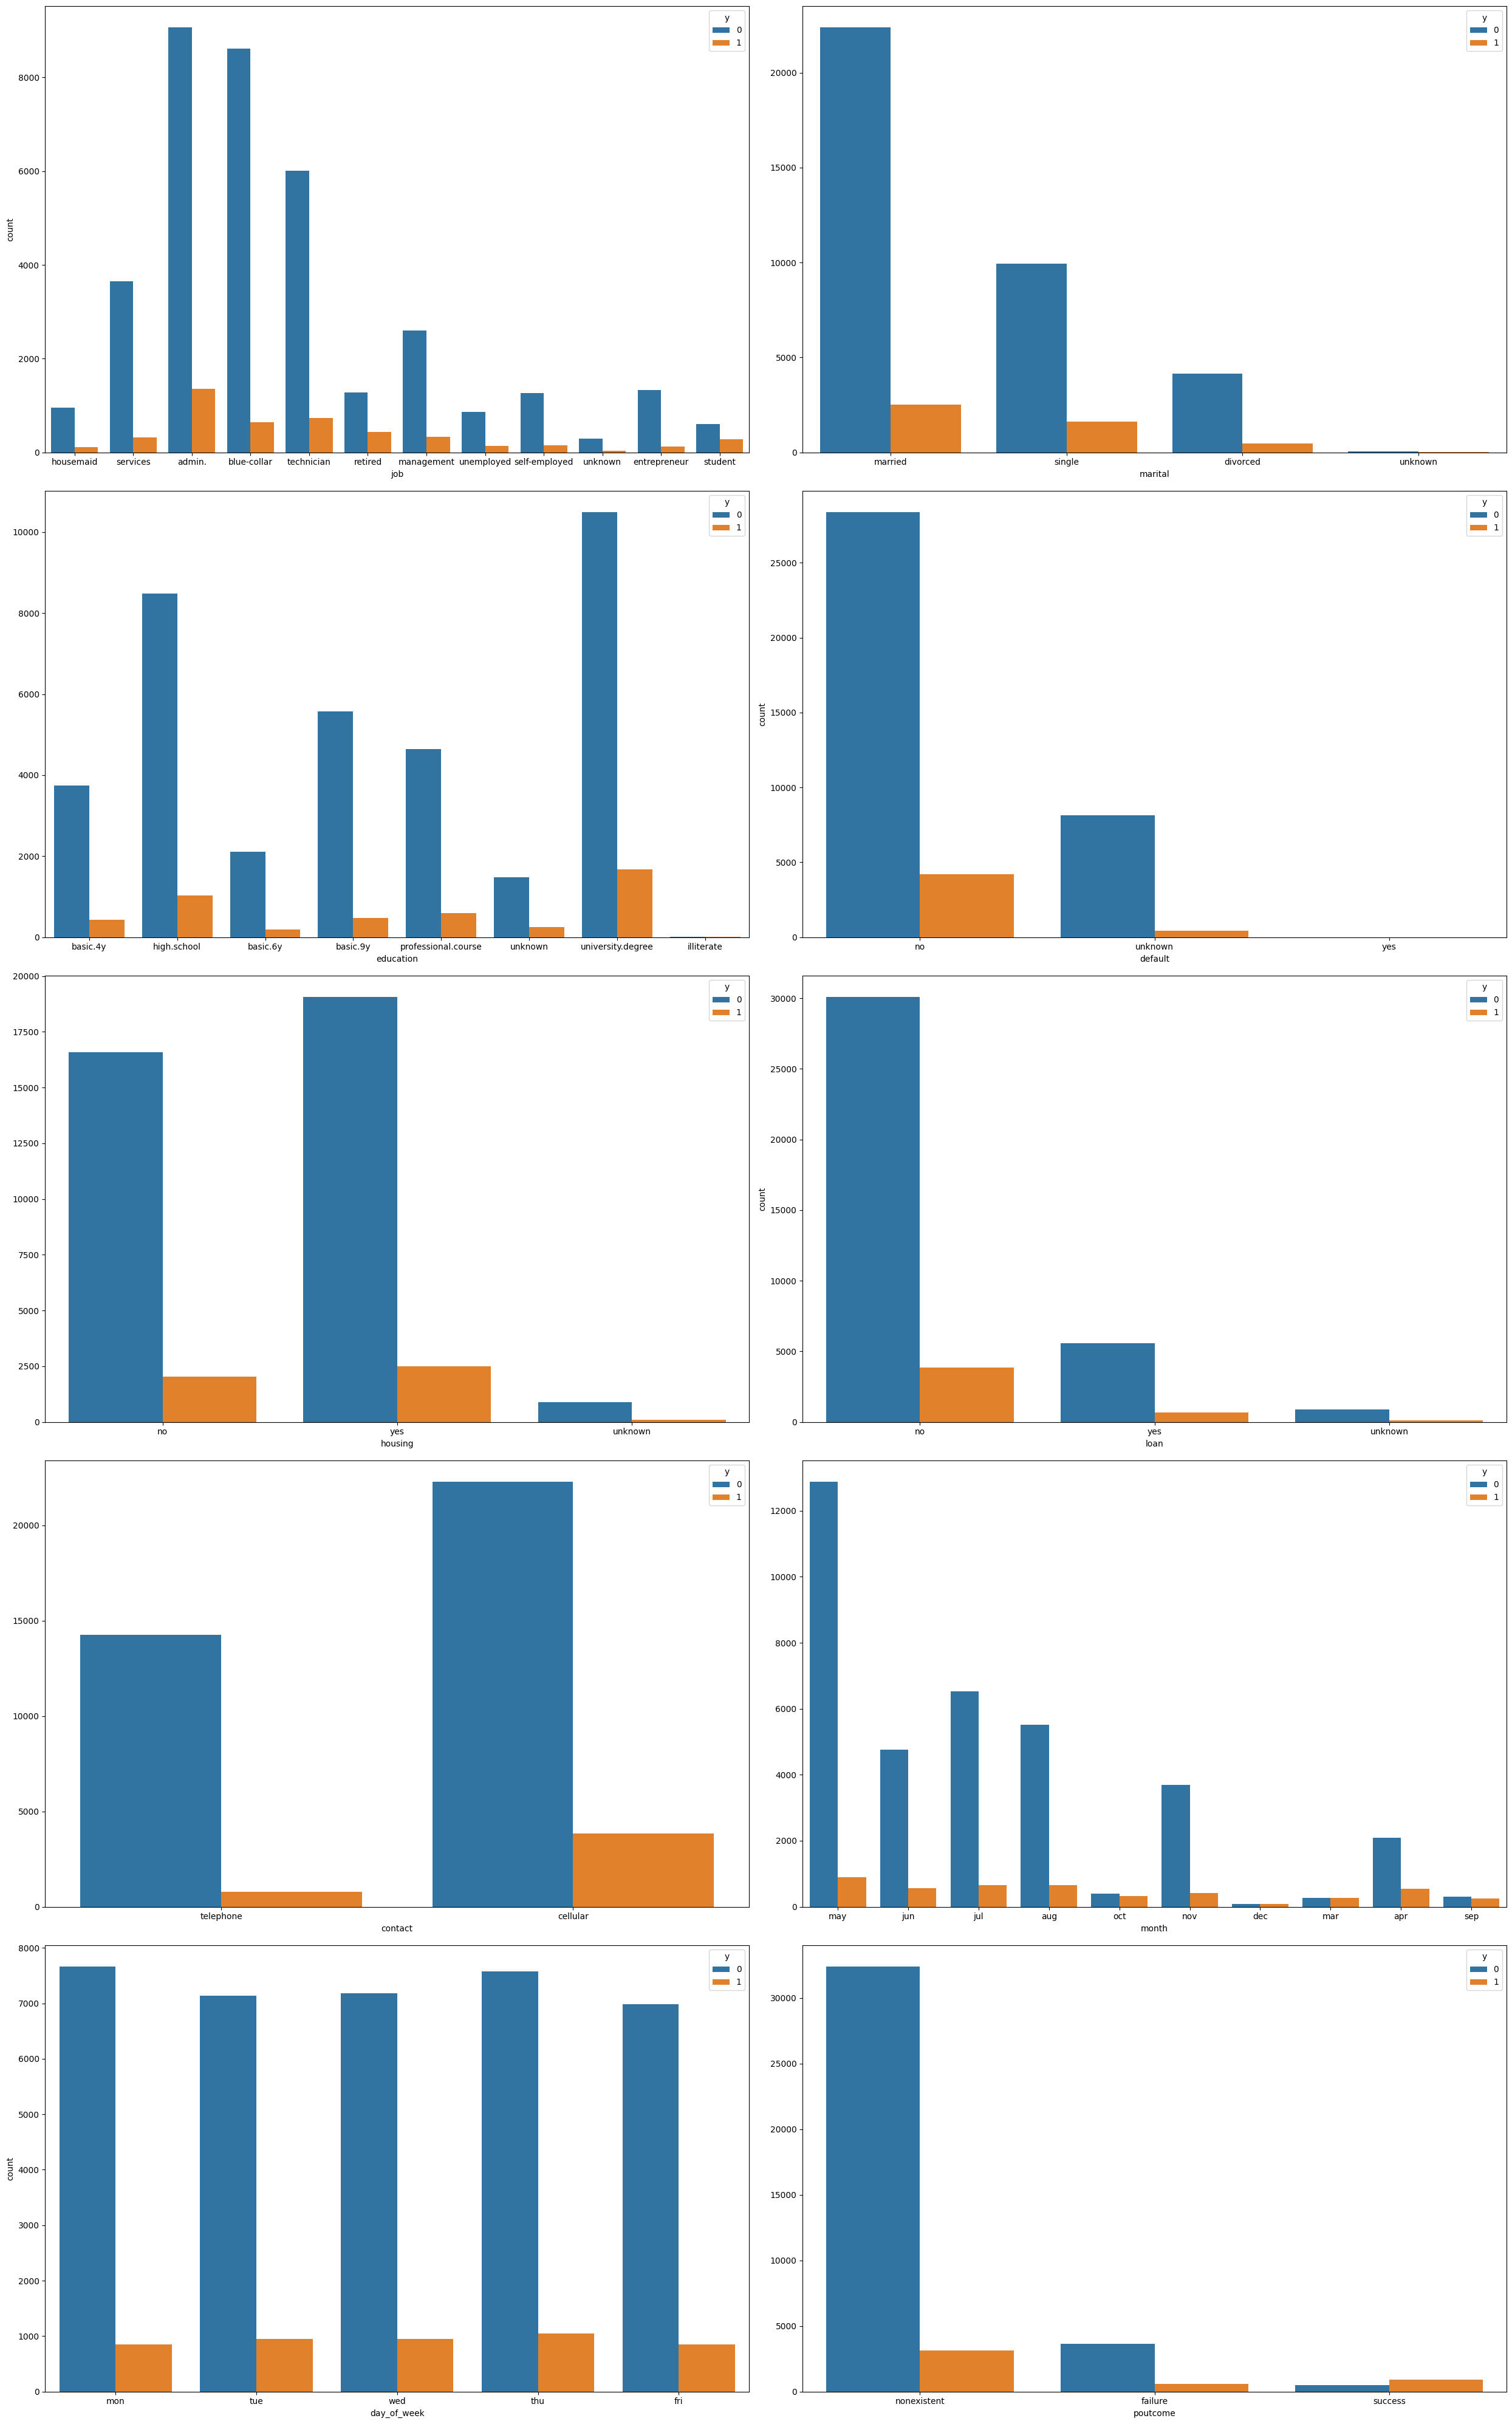

In [14]:
fig, axis = plt.subplots(5, 2, figsize = (25, 40))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = df, x = "default", hue = "y")
sns.countplot(ax = axis[2, 0], data = df, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df, x = "loan", hue = "y")
sns.countplot(ax = axis[3, 0], data = df, x = "contact", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3, 1], data = df, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[4, 0], data = df, x = "day_of_week", hue = "y")
sns.countplot(ax = axis[4, 1], data = df, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()
plt.show()

- Age: apenas existe relación entre la edad y la contratación 
- Duration: existe una correlación positiva importante entre el valor target y duration (duracion del ultimmo contacto)
- Campaign: apenas se aprecia coorelación negativa 
- Loan, default: el hecho de tener créditos pre-existentes limita mucho la contratación. No pasa así con la hipoteca. 
- Contacto: infulye el que se haga por movil, se congigue mayor éxito.
- Dia de la semana: no se aprecia demasiada influencia


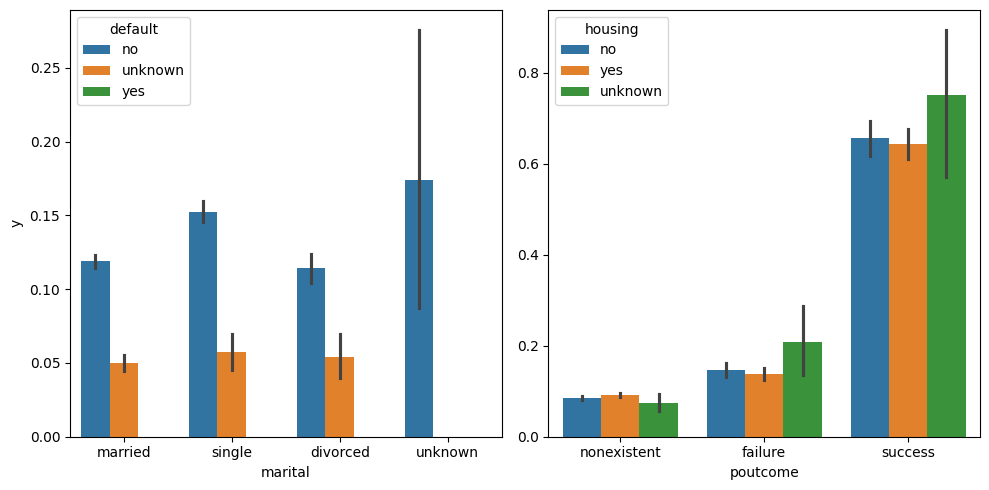

In [15]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "marital", y = "y", hue = "default")
sns.barplot(ax = axis[1], data = df, x = "poutcome", y = "y", hue = "housing").set(ylabel = None)

plt.tight_layout()

plt.show()

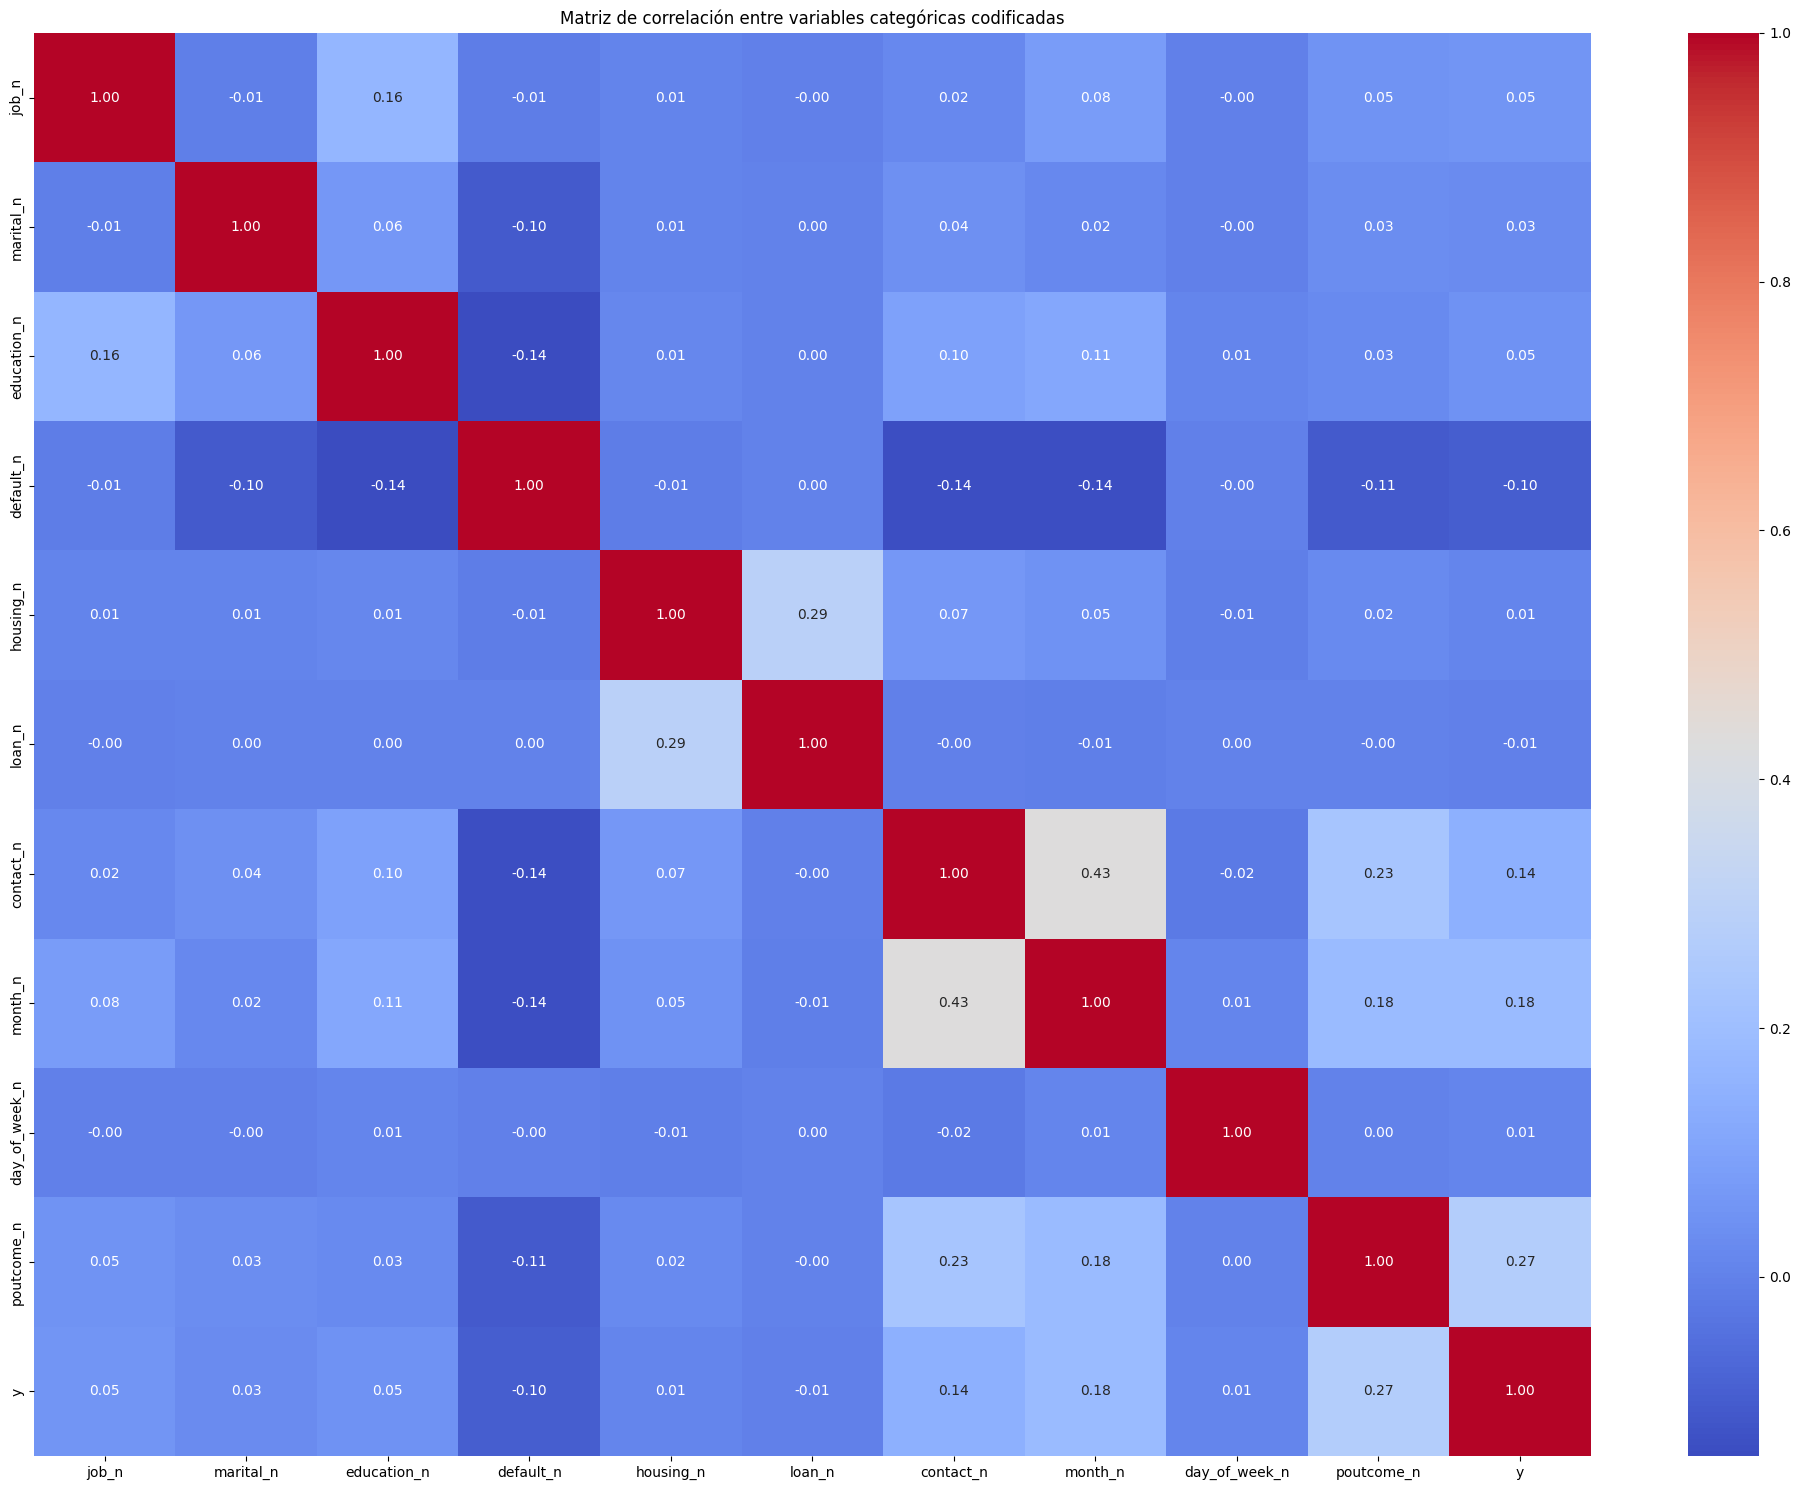

In [16]:
df['marital_n'] = pd.factorize(df['marital'])[0]
df['day_of_week_n'] = pd.factorize(df['day_of_week'])[0]
df['poutcome_n'] = pd.factorize(df['poutcome'])[0]
df['contact_n'] = pd.factorize(df['contact'])[0]
df['month_n'] = pd.factorize(df['month'])[0]
df['housing_n'] = pd.factorize(df['housing'])[0]
df['loan_n'] = pd.factorize(df['loan'])[0]
df['education_n'] = pd.factorize(df['education'])[0]
df['default_n'] = pd.factorize(df['default'])[0]
df['job_n'] = pd.factorize(df['job'])[0]


fig, axis = plt.subplots(figsize=(20, 15))

sns.heatmap(df[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 
                'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y']].corr(),
            annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Matriz de correlación entre variables categóricas codificadas")
plt.tight_layout()
plt.show()


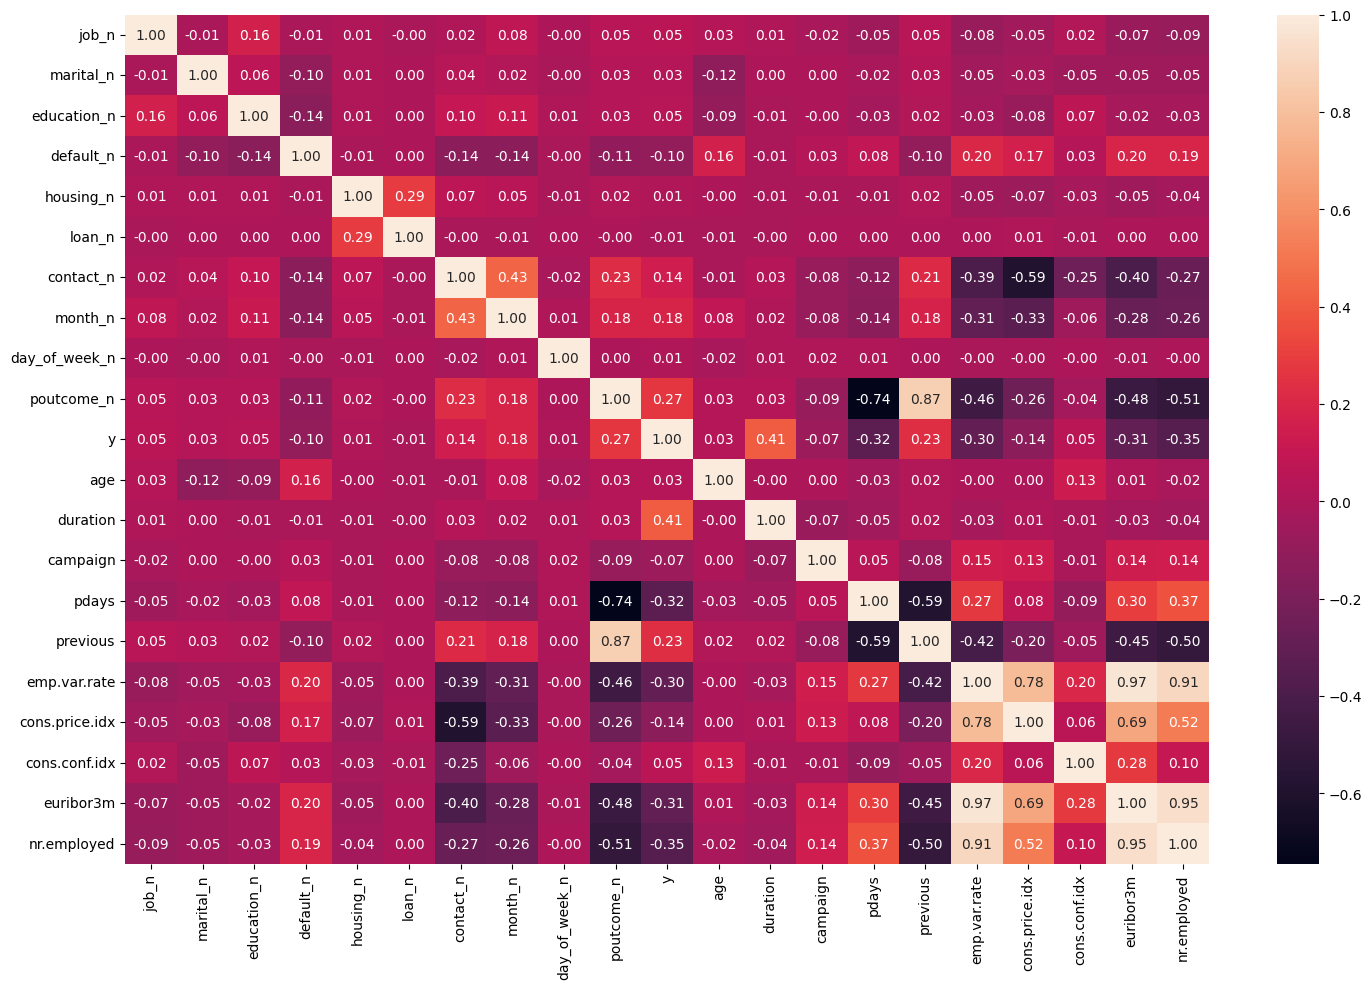

In [17]:
fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(df[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 
                'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [26]:
# los atributos que no muestran corelación son; age, job, marital, education, housing, day of week y cons.conf.idx
df_reducido = df.drop([
    'age', 'job', 'job_n', 'marital_n', 'marital', 'education', 'education_n',
    'housing', 'housing_n', 'day_of_week', 'day_of_week_n', 'cons.conf.idx'
], axis=1).copy()


In [31]:
df_reducido.drop(['loan', 'month', 'default', 'poutcome', 'contact', 'default'], axis=1, inplace=True)

outliers: age, duration, campain, cons.conf.idx

In [32]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_reducido['duration'].quantile(0.25)
Q3 = df_reducido['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [34]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_reducido['duration'].quantile(0.25)
Q3 = df_reducido['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 970.0 y -549.0, con un rango intercuartílico de 217.0


In [ ]:
df_reducido[df_reducido['duration']>970]['y'].sum() # 1043 valores, con 618 contrataciones, me parece que no se pueden descartar tantos.

np.int64(618)

In [38]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_reducido['campaign'].quantile(0.25)
Q3 = df_reducido['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [39]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_reducido['campaign'].quantile(0.25)
Q3 = df_reducido['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 9.0 y -5.0, con un rango intercuartílico de 2.0


In [44]:
df_reducido[df_reducido['campaign']>10]['y'].sum()  # 689 valores con 27 resultados positivos
df_reducido=df_reducido[df_reducido['campaign']<10]

In [48]:
df_reducido.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'y', 'poutcome_n',
       'contact_n', 'month_n', 'loan_n', 'default_n'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split

num_variables = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'poutcome_n',
       'contact_n', 'month_n', 'loan_n', 'default_n']

# Dividimos el conjunto de datos en muestras de train y test
X = df_reducido.drop('y', axis = 1)[num_variables]
y = df_reducido['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head(20)

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,poutcome_n,contact_n,month_n,loan_n,default_n
5268,57,4,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,1
35107,251,1,999,0,-1.8,92.893,1.250,5099.1,0,1,0,0,0
9474,123,1,999,0,1.4,94.465,4.961,5228.1,0,0,1,1,0
3476,196,4,999,0,1.1,93.994,4.860,5191.0,0,0,0,0,0
40602,251,3,2,4,-1.1,94.199,0.883,4963.6,2,1,9,0,0
30254,103,3,999,0,-1.8,93.075,1.365,5099.1,0,1,8,0,0
24620,85,2,999,0,-0.1,93.200,4.191,5195.8,0,1,5,0,0
16483,148,1,999,0,1.4,93.918,4.963,5228.1,0,1,2,0,1
9188,227,1,999,0,1.4,94.465,4.967,5228.1,0,0,1,0,0
32546,423,1,999,0,-1.8,92.893,1.313,5099.1,0,1,0,0,0


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Variables que NO se escalan
no_escalar = ['contact_n', 'loan_n', 'default_n']

# Variables que SÍ se escalan (todas menos las binarias)
variables_a_escalar = [col for col in X_train.columns if col not in no_escalar]

# Escalar
scaler = MinMaxScaler()
X_train_escalado = pd.DataFrame(
    scaler.fit_transform(X_train[variables_a_escalar]),
    index=X_train.index,
    columns=variables_a_escalar
)

X_test_escalado = pd.DataFrame(
    scaler.transform(X_test[variables_a_escalar]),
    index=X_test.index,
    columns=variables_a_escalar
)

# Concatenar las no escaladas al final
X_train_final = pd.concat([X_train_escalado, X_train[no_escalar]], axis=1)
X_test_final = pd.concat([X_test_escalado, X_test[no_escalar]], axis=1)

X_train_final.head()


,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,poutcome_n,month_n,contact_n,loan_n,default_n
5268,0.011590,0.375,1.000000,0.000000,0.937500,0.698753,0.957379,0.859735,0.0,0.000000,0,0,1
35107,0.051037,0.000,1.000000,0.000000,0.333333,0.269680,0.139651,0.512287,0.0,0.000000,1,0,0
9474,0.025010,0.000,1.000000,0.000000,1.000000,0.882307,0.980957,1.000000,0.0,0.111111,0,1,0
3476,0.039854,0.375,1.000000,0.000000,0.937500,0.698753,0.958059,0.859735,0.0,0.000000,0,0,0
40602,0.051037,0.250,0.002002,0.571429,0.479167,0.778644,0.056450,0.000000,1.0,1.000000,1,0,0


In [60]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 11)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,poutcome_n,contact_n,month_n,default_n
0,57.0,999.0,0.0,1.1,93.994,4.857,5191.0,0.0,0.0,0.0,1.0
1,251.0,999.0,0.0,-1.8,92.893,1.250,5099.1,0.0,1.0,0.0,0.0
2,123.0,999.0,0.0,1.4,94.465,4.961,5228.1,0.0,0.0,1.0,0.0
3,196.0,999.0,0.0,1.1,93.994,4.860,5191.0,0.0,0.0,0.0,0.0
4,251.0,2.0,4.0,-1.1,94.199,0.883,4963.6,2.0,1.0,9.0,0.0


In [61]:
X_train_sel.to_csv("/workspaces/Finarosalina_machine-learning-python-template/data/processed.csv", index=False)
X_test_sel.to_csv("/workspaces/Finarosalina_machine-learning-python-template/data/processed.csv", index=False)

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(8017,))

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9039540975427217

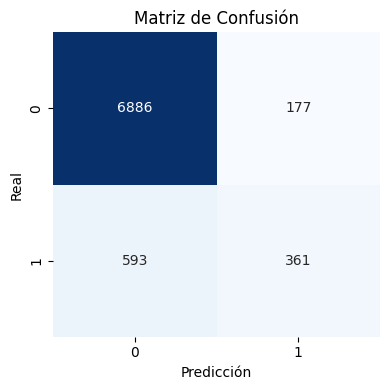

In [65]:
from sklearn.metrics import confusion_matrix

# Confusion matrix para df_reducido
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y_test.unique())  # por ejemplo: ['no', 'yes']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualización
plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

plt.tight_layout()
plt.show()


In [66]:
coeficientes = pd.Series(model.coef_[0], index=X_train.columns)
print(coeficientes.sort_values(ascending=False))


cons.price.idx    0.334926
month_n           0.096351
contact_n         0.060631
duration          0.004313
pdays            -0.001701
nr.employed      -0.006426
loan_n           -0.018225
poutcome_n       -0.051907
campaign         -0.055358
previous         -0.058927
default_n        -0.069978
euribor3m        -0.197252
emp.var.rate     -0.242499
dtype: float64


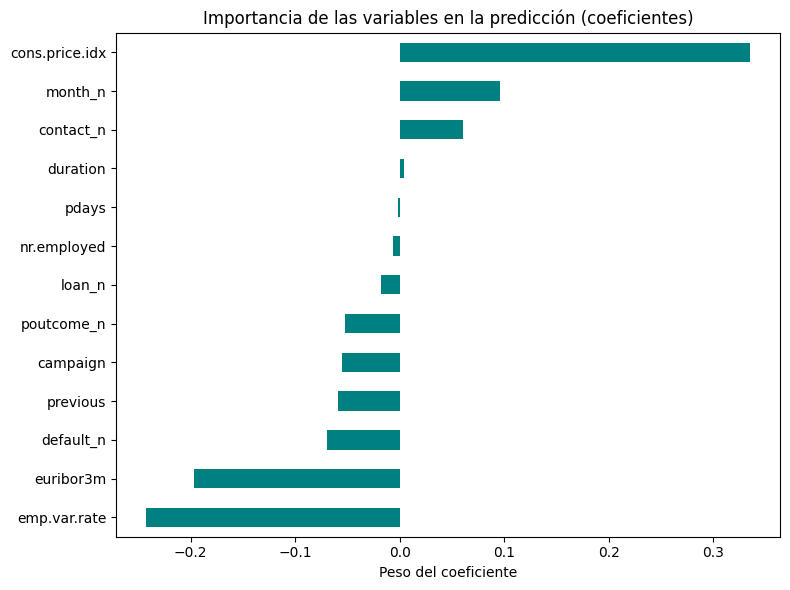

In [67]:
coef_df = coeficientes.sort_values().plot(kind='barh', figsize=(8, 6), color='teal')
plt.title("Importancia de las variables en la predicción (coeficientes)")
plt.xlabel("Peso del coeficiente")
plt.tight_layout()
plt.show()


In [68]:
# OPTIMIZACION DEL MODELO

# Crear el modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = model.predict(X_test)

# Calcular accuracy
base_accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {base_accuracy:.4f}")

Precisión del modelo: 0.9045


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
